# <font size=6 color='green'><center>**IT 496 - Introduction to Data Mining**</center></font>
### **<center>Course Project - 02<br/><br/>Data Preprocessing, EDA and Classification Analysis<center>**

 &emsp; **Group Name : <font color='#0099ff'>DataForce</font>** <br/>
 &emsp; **Group ID : <font color='#0099ff'>T06</font>**
 <br/>&emsp; **Dateset : <font color='#0099ff'>IP Network Traffic Flows</font>**

### <center>Introduction </center>

**Dataset Name**: IP Network Traffic Flows
     
  The given dataset is about the network flow statistics collected by performing packet captures over 6 days of April 2017. It contains information about an IP flow. An Ip flow consists of all traffic that belongs to the same communication context, that is the same connection between two network devices.  Information about a sequence of packets is included. Datafields like Source IP, destination IP, source and destination port addresses, protocols used, interarrival times(time gap between two packets), etc are stored and are collected through CICIFlowmeter app.
 
**Dataset link**:https://www.kaggle.com/datasets/jsrojas/ip-network-traffic-flows-labeled-with-87-apps <br/>
**Documentation**: https://github.com/Gangaraj-eng/IT496_DataForce_CourseProject1/blob/Course_Project_2/README.md


**Problem statement - Application layer protocol identification** Based on the network flow details, the task is to classify which application layer protocol, the given flow used based on attributes like number of forward and backward packets, flags used, forward and backward segments, etc.

### <center>Exploratory Data Analysis</center>

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
# the path of the csv file
csv_file_path = "C:\\Users\\rajini bopparam\\sem_7\\IT496\\Project\\Dataset-Unicauca-Version2-87Atts.csv"
Data = pd.read_csv(csv_file_path)

Data.head()

In [ ]:
Data.shape

The dataset contains $35,77,296$rows and $87$columns.

Reducing the dataset size due to limit in RAM

In [ ]:
import random
# randomly select 100000 instances
Data =  Data.sample(n=100000)

In [ ]:
Data.columns

In [ ]:
Data.info()

Most of the attributes are of numeric type, except a few nominal attributes like ProtocolName, Label,

In [6]:
Data.describe()

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,100000.000000,100000.000000,100000.00000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,...,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,37976.398450,12044.767390,6.00670,2.532237e+07,62.614700,63.861060,4.715488e+04,8.527771e+04,509.066270,9.010310,...,25.711280,2.763276e+05,1.834801e+05,5.020751e+05,1.463571e+05,8.442391e+06,1.388018e+06,9.675346e+06,7.153528e+06,102.683500
std,22002.783668,20440.670646,0.33069,4.008110e+07,1460.191568,965.861739,2.550231e+06,1.740264e+06,1028.250026,81.506551,...,6.014878,2.089740e+06,1.338679e+06,3.088346e+06,1.772173e+06,1.695801e+07,4.875813e+06,1.882481e+07,1.586933e+07,51.389666
min,0.000000,0.000000,0.00000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000
25%,3739.750000,443.000000,6.00000,6.400000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,91.000000
50%,49363.000000,3128.000000,6.00000,5.714690e+05,6.000000,5.000000,4.430000e+02,2.160000e+02,206.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,126.000000
75%,53731.000000,3128.000000,6.00000,4.499740e+07,15.000000,15.000000,1.758000e+03,3.643000e+03,609.000000,6.000000,...,32.000000,3.700000e+01,0.000000e+00,4.900000e+01,1.000000e+00,6.941035e+06,0.000000e+00,7.418937e+06,5.272853e+06,130.000000
max,65534.000000,65532.000000,17.00000,1.200000e+08,328695.000000,119368.000000,6.780236e+08,2.493728e+08,24616.000000,6320.000000,...,44.000000,1.051577e+08,7.005261e+07,1.051577e+08,1.051577e+08,1.199998e+08,7.655018e+07,1.199998e+08,1.199998e+08,222.000000


Plotting the correlation matrix

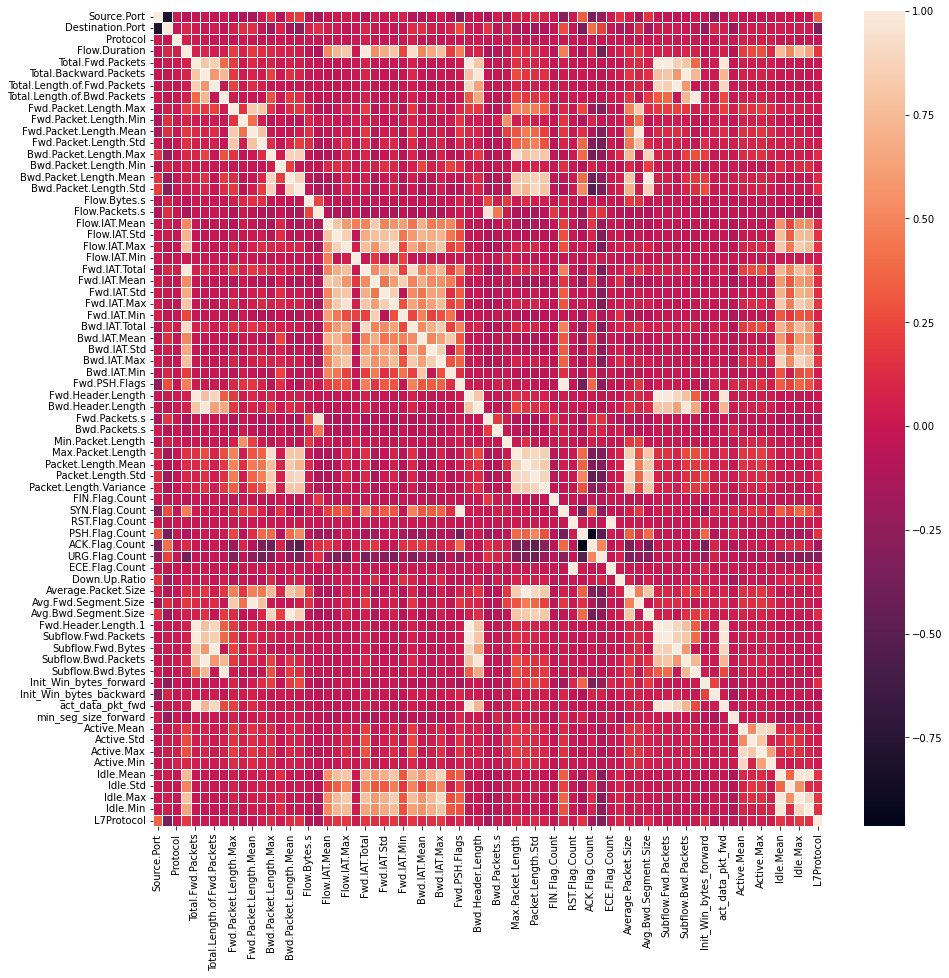

In [7]:
numeric_data = Data.select_dtypes(include =[np.number]) # keep only numerical columns
numeric_data = numeric_data[[col for col in numeric_data if numeric_data[col].nunique() > 1]]
corr_matrix = numeric_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(data = corr_matrix, lw=1)
plt.show()

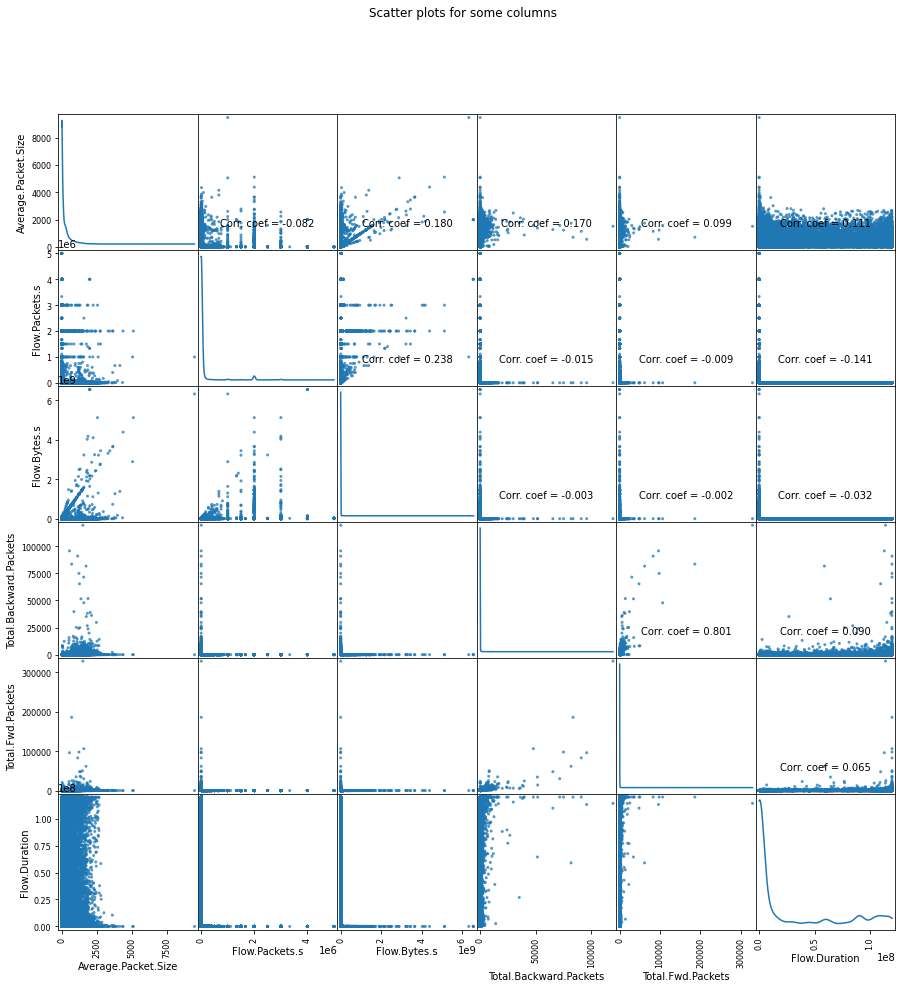

In [8]:
ipMeasureColumns = ['Average.Packet.Size','Flow.Packets.s','Flow.Bytes.s','Total.Backward.Packets','Total.Fwd.Packets','Flow.Duration']

ax = pd.plotting.scatter_matrix(Data[ipMeasureColumns], alpha=0.75, figsize=[15,15], diagonal='kde')
corrs = Data[ipMeasureColumns].corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.5, 0.2), xycoords='axes fraction', ha='center', va='center')
plt.suptitle('Scatter plots for some columns')
plt.show()

There is no high correlation between any of thes columns

Boxplots for the numeric columns

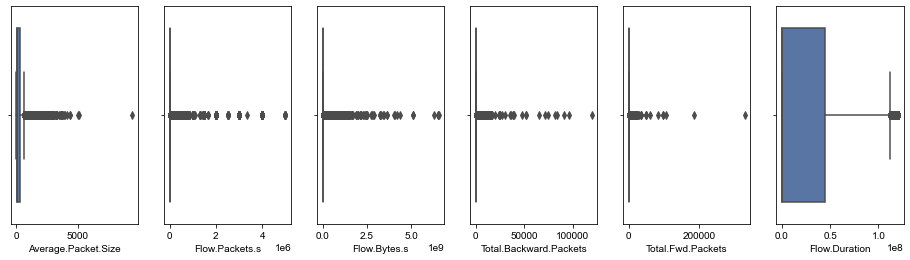

In [9]:
fig, ax = plt.subplots(1, 6, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(ipMeasureColumns):
    sns.boxplot(x=Data[col], ax=ax[axid])

All of these columns are right-skewed!!

In [10]:
uniqueProtocols=Data['ProtocolName'].unique()
print(uniqueProtocols)

['HTTP_PROXY' 'YOUTUBE' 'GOOGLE' 'SSL' 'HTTP_CONNECT' 'HTTP' 'AMAZON'
 'MICROSOFT' 'WINDOWS_UPDATE' 'FACEBOOK' 'UBUNTUONE' 'CLOUDFLARE' 'APPLE'
 'GMAIL' 'YAHOO' 'TWITTER' 'MQTT' 'DROPBOX' 'CONTENT_FLASH' 'OFFICE_365'
 'SKYPE' 'WHATSAPP' 'MSN' 'INSTAGRAM' 'TEAMVIEWER' 'DNS' 'WIKIPEDIA'
 'EASYTAXI' 'IP_ICMP' 'APPLE_ITUNES' 'APPLE_ICLOUD' 'EBAY' 'GOOGLE_MAPS'
 'SSL_NO_CERT' 'MS_ONE_DRIVE' 'SPOTIFY' 'NETFLIX' 'HTTP_DOWNLOAD' 'SSH'
 'TWITCH' 'TOR' 'NTP' 'FTP_DATA' 'TELEGRAM' 'EDONKEY' 'UNENCRYPED_JABBER'
 'UPNP' 'WAZE' 'CITRIX_ONLINE' 'DEEZER' 'H323' 'TIMMEU' 'OPENSIGNAL']


Lets see the distribution of these protocols

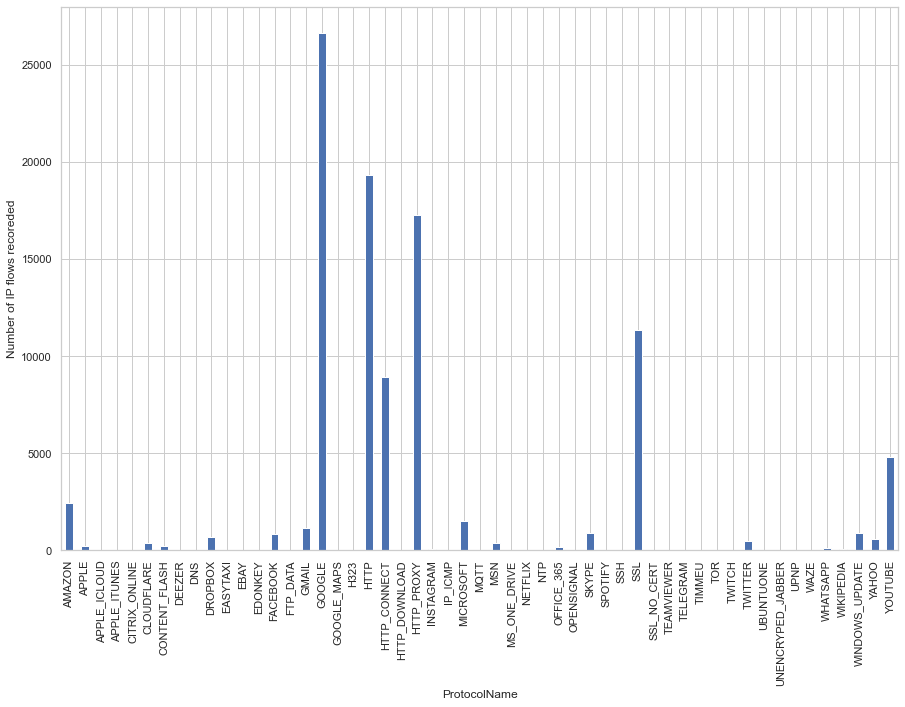

In [11]:
Data.groupby('ProtocolName').size().plot(kind='bar',figsize=(15,10))
plt.ylabel('Number of IP flows recoreded')
plt.show()

We can see that most of the ip flows are using Google Protocol followed by HTTP and HTTP_Proxy!!

In [12]:
Data['Label'].unique()

array(['BENIGN'], dtype=object)

The label attribute has only a single value for all examples and thus not so useful in classification analysis!!. Hence, it can be ignored

In [13]:
Data['Timestamp']

826094     27/04/201709:55:45
2144450    09/05/201710:13:24
2659483    11/05/201710:46:04
542243     27/04/201708:28:56
1879065    28/04/201710:12:33
                  ...        
3121366    15/05/201709:59:39
275617     26/04/201703:17:04
1386202    27/04/201705:54:02
3097344    15/05/201709:54:31
1466685    27/04/201706:14:15
Name: Timestamp, Length: 100000, dtype: object

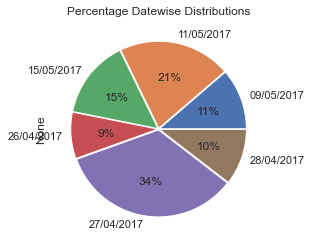

In [14]:
def getDateFromTimeStamp(timestamp):
    return timestamp[0:10]

df=Data
df['Timestamp']=df['Timestamp'].apply(getDateFromTimeStamp)
df.groupby('Timestamp').size().plot(kind='pie',autopct='%1.0f%%', explode=[0.01]*6,title='Percentage Datewise Distributions')
plt.show()

The above plot shows the distribution of data recoreded on 6 days.

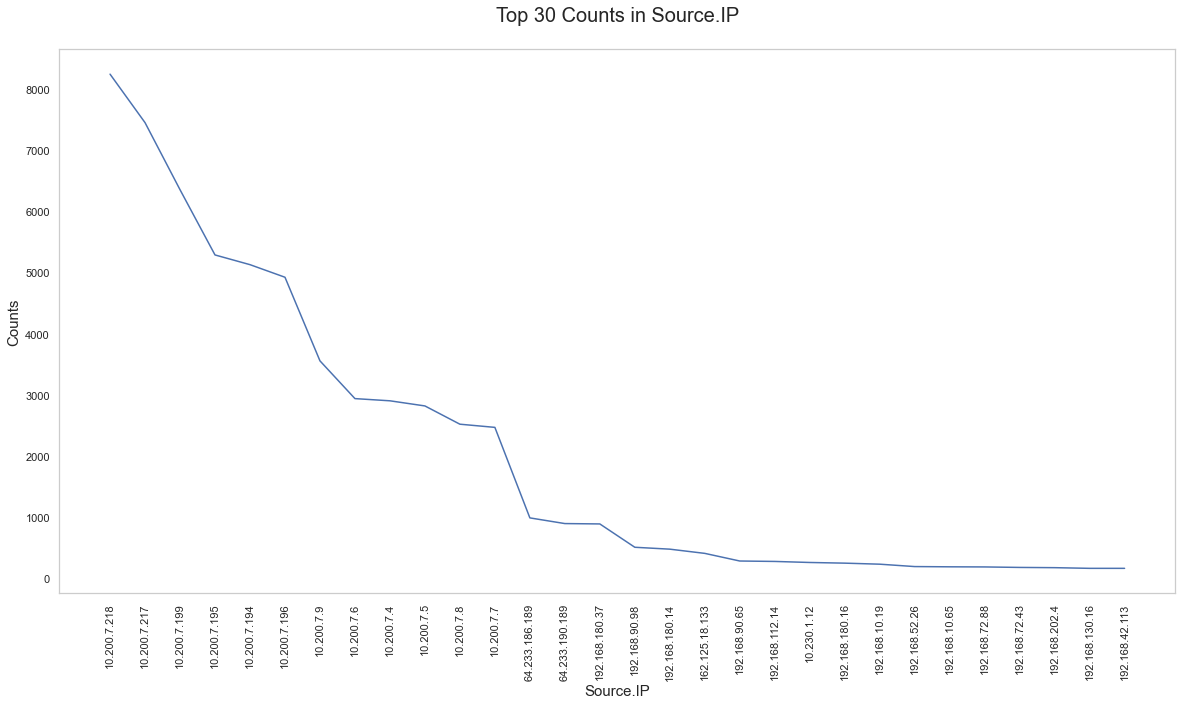

In [15]:
sourceIPCounts = pd.DataFrame(Data['Source.IP'].value_counts()[:30])
plt.figure(figsize=(20,10))
plt.plot(sourceIPCounts)
# to display the ip address verticall
plt.xticks(rotation=90)
plt.xlabel('Source.IP', {'fontsize':15})
plt.ylabel('Counts', {'fontsize':15})
plt.title('Top 30 Counts in Source.IP\n', {'fontsize':20})
plt.grid()

These are the 30 most soucre IP addresses recorded with corresponding frequencies

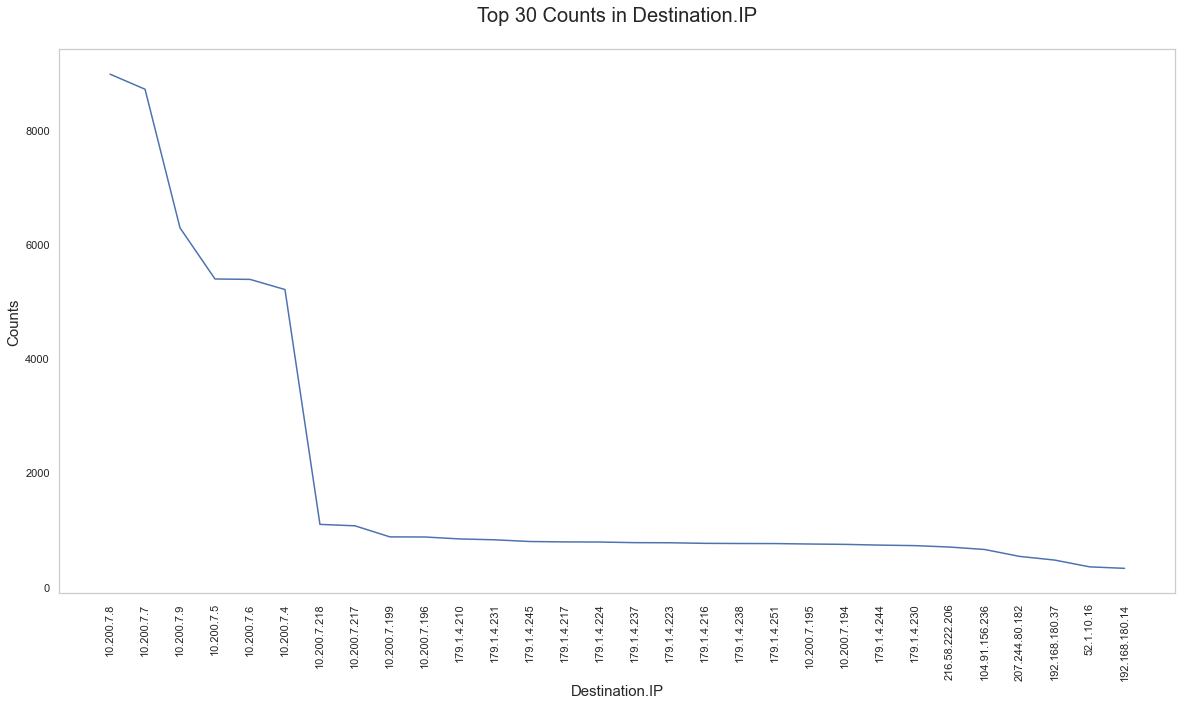

In [16]:
DestIpCounts = pd.DataFrame(Data['Destination.IP'].value_counts()[:30])
plt.figure(figsize=(20,10))
plt.plot(DestIpCounts)
# to display the ip address verticall
plt.xticks(rotation=90)
plt.xlabel('Destination.IP', {'fontsize':15})
plt.ylabel('Counts', {'fontsize':15})
plt.title('Top 30 Counts in Destination.IP\n', {'fontsize':20})
plt.grid()

Similary 30 top destination addresses

# 1.Application layer protocol identification

### <center>Data Preprocessing</center>

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

#### Feature selection

Removing columns which are independent of protocol

In [ ]:
# columns to be removed
# as protocol doesn't depend on these attributes because they are just some identifiers
remove_columns = ['Flow.ID','Source.IP','Source.Port','Destination.IP','Destination.Port']

# protocol used is independent of the timestamp
remove_columns.append('Timestamp')

# L7Protocol and ProtocolName are same except one is label and other is string
remove_columns.append('L7Protocol')

Data.drop(remove_columns, axis = 1, inplace=True)

Removing columns having a single value for all instances

In [ ]:
frequencies = Data.nunique()
singleValuedColumns = frequencies[frequencies==1].index

In [ ]:
singleValuedColumns

In [ ]:
Data.drop(singleValuedColumns, axis = 1, inplace = True)
Data.shape

#### Encoding for nominal attributes


In [ ]:
labelEncoder = preprocessing.LabelEncoder()
nominalColumns = Data.columns[Data.dtypes == 'object']
Data[nominalColumns] = Data[nominalColumns].apply(labelEncoder.fit_transform)
Data.head()

### <center>Classification Analysis</center>

Train and Test splits

In [ ]:
xData = Data.drop(['ProtocolName'],axis=1)
yData = Data['ProtocolName']
x_train, x_test, y_train, y_test = train_test_split(xData, yData, random_state = 40, test_size = 0.20)

print(f"Training size = {len(y_train)}")
print(f"Test size = {len(y_test)}")
x_train.shape, x_test.shape

#### Normalization and outlier removal

We can use sklearn RobustScaler for normalization and to remove outliers using standard IQR method

In [ ]:
# normalizing train and test sets seperately so that no information from 
# test set will be leaked
scaler = RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(f"Shape of training data after normalizing = {x_train.shape}")
print(f"Shape of test data after normalizing = {x_test.shape}")


The number of rows remained unchanged suggesting absence of major outliers
Here, Train and Test sets are normalized seperately so that there will be no leakage of information from test set while training

#### Classification Models

We are using the following models for classification:

1. Logistic Regression
2. Linear SVM
3. kernel svm
4. Decision Tree Classifier

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

models = {
    
    'LogisticRegression':{
        'model':LogisticRegression(random_state = 40),
        'parameters':{
            'penalty':['l2'],
            'C':[1,2], # regularization parameter
            'max_iter':[500]
        }
    },
    
    'LinearSVC':{
        'model':LinearSVC(random_state = 40),
        'parameters':{
            'loss':['hinge'],
            'C':[1], # regularization parameter
            'max_iter':[500]
        }
    },
    
    'KernelSVM':{
        'model':SVC(random_state = 40),
        'parameters':{
            'C':[1,2], # regularization parameter
            'kernel':[rbf']
#             'degree':[2,3] # only for polynomial kernel
        }
    },
    
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(random_state = 40),
        'parameters':{
            'criterion':['gini'],
            'max_depth':[10],
            'max_features':['auto']
        },
    }
}

Model Training

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
import time

results = pd.DataFrame()

results['Accuracy'] = None
results['Precision'] = None
results['Recall'] = None
results['F1 Score'] = None
results['Best Params']=None
results['Time taken']=None
results['Best classifier']=None


best_model =None
best_f1score = 0

In [ ]:


for modelName, classifier in models.items():
    start = time.time()
    classifierModel = GridSearchCV(classifier['model'], classifier['parameters'],n_jobs = 10, verbose = 1)
    print(f"Started training for {modelName}:")
    classifierModel.fit(x_train,list(y_train))
    best_classifier = classifierModel.best_estimator_
    end = time.time()
    time_taken = end-start
    y_train_pred = best_classifier.predict(x_train)
    
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average = 'weighted')
    f1score = f1_score(y_train, y_train_pred, average = 'weighted')
    if f1score < best_f1score:
        best_f1score = f1score
        best_model = modelName
    
    print(f"Completed training for {modelName} \t Time taken : {time_taken} seconds\n")
    
    results.loc[modelName,['Accuracy','Precision','Recall','F1 Score','Best Params','Time taken','Best classifier']] = [accuracy, precision, recall, f1score, classifierModel.best_params_,time_taken,best_classifier]

In [ ]:
pickle_out = open('result.pkl','wb')
pickle.dump(results,pickle_out)
pickle_out.close()

### <center>Evaluation</center>